In [1]:
from math import e, factorial,log, gamma, sqrt, floor
from matplotlib import pyplot as pt
from numpy.random import geometric, poisson, exponential
from scipy.stats import ks_2samp
from scipy.stats import norm,poisson
from numpy import linspace

## Utility functions

In [2]:
def computeEvents(V, ttx, trx, tn):
    Eb = 0
    Es = 0
    En = 0

    for c in V:
        if c == 'B':
            Eb += 1
        elif c == 'S':
            Es += 1
        else:
            En += 1
    
    return (Eb/ttx,Es/trx,En/tn)

def countSuccessT1(V1,V2):
    Cb = []
    i = 0
    for b,s in zip(V1,V2):
        if b =='B' and s =='S':
            Cb.append(i)
        i+=1
    return Cb

def countBroadcast(V1,V2,Trx,Ttx):
    indexes = []
    i = 0
    Cb = {}
    while i<len(V2):
        if V2[i] == 'S':
            indexes.append(i)
            i += Trx

        else:
            i+=1
    for ind in indexes:
        Cb[ind] = 0
        for j in range(ind,ind+Trx):
            if j >= len(V1):
                break
            if V1[j] == 'B':
                Cb[ind] += 1
        Cb[ind] = floor(Cb[ind]/Ttx)
    
    return Cb

def buildHistogram(Cb,Trx,Ttx):
    hist = [0 for x in range(int(2*Trx/Ttx))]
    n = 1/len(Cb)
    for k in Cb:
        try:
            hist[round(Cb[k])] += n
        except:
            print(round(Cb[k]))
    return hist

def buildHistogramV(V, l = 0):
    hist = None
    if l:
        hist = [0 for x in range(l)]
    else:
        hist = [0 for x in range(len(V))]

    for k in V:
        try:
            hist[k] += 1
        except:
            break
        
    return hist

def rmse(v1,v2):
    rmse = 0
    for x1,x2 in zip(v1,v2):
        rmse += (x1-x2)**2
    return sqrt(rmse/len(v1))

## Probability mass functions 
- Geometric 
- Poisson 
- Exponential


In [3]:
def geom_pmf(p,maxK):
    return [p*(1-p)**k for k in range(0,maxK)]

def poisson_pmf(lam,maxK):
    return [e**(k*log(lam)-(lam)-log(gamma((k+1)))) for k in range(0,maxK)]

def exponential_pmf(lam, maxK):
    return [lam*(e**(-lam*k)) for k in range(0,maxK)]


# Load data

In [4]:
f1 = open("r5-d0-result.txt")
raw1 = f1.read()
f1.close()

f2 = open("r5-d1-result.txt")
raw2 = f2.read()
f2.close()

f3 = open("r5-d2-result.txt")
raw3 = f3.read()
f3.close()


In [5]:

Eb = 0
Es = 0
En = 0

Ttx = 1
Trx = 11
Tn = 1

Eb,Es,En = computeEvents(raw1,Ttx,Trx,Tn)

print("P(S) = %.6f"%(Trx*Es/len(raw1)))
print("P(N) = %.6f"%(Tn*En/len(raw1)))
print("P(B) = %.6f"%(Ttx*Eb/len(raw1)))

l1 = 1000*Eb / (len(raw1))

t = Trx/1000
rt = l1*t

print("r(B)(Events/s) = %.6f"%(l1))
print("rt = %.6f"%(l1*t))

Cb1 = countBroadcast(raw2,raw1,Trx,Ttx)

Cb2 = countBroadcast(raw3,raw1, Trx,Ttx) 

hist1 = buildHistogram(Cb2,Trx,Ttx)

print("Success probability= %.6f"%sum(hist1[1:]))

P(S) = 0.939048
P(N) = 0.000001
P(B) = 0.060951
r(B)(Events/s) = 60.951062
rt = 0.670462
Success probability= 0.488062


In [13]:
pois_d = poisson_pmf(rt,len(hist1))
print("RMSE Poisson= %.6f"%rmse(pois_d,hist1)) 
rv = poisson(rt)
rvd = rv.pmf(range(len(hist1)))
cp = poisson.cdf(range(len(hist1)),rt)
print("RMSE Poisson= %.6f"%rmse(rvd,hist1)) 
geom_d = geom_pmf(hist1[0],len(hist1))
print("RMSE Geom= %.6f"%rmse(geom_d,hist1))
pcdf = [sum(pois_d[0:i]) for i in range(len(hist1))]

RMSE Poisson= 0.004631
RMSE Poisson= 0.004631
RMSE Geom= 0.024700


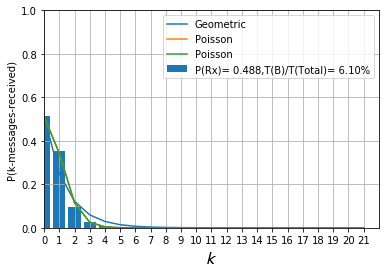

In [18]:
pt.plot(range(len(hist1)),geom_d,label='Geometric')
pt.plot(range(len(hist1)),pois_d,label='Poisson')
pt.plot(range(len(hist1)),rvd,label='Poisson')
#pt.plot(range(10),cp[0:10],'g')
#pt.plot(range(10),pcdf[0:10],'r')
pt.bar(range(len(hist1)),hist1,label="P(Rx)= %.3f,T(B)/T(Total)= %.2f%%"%(sum(hist1[1:]),100*Ttx*Eb/len(raw1)))

pt.legend()
pt.axis([0,len(hist1),0,1.0])
#pt.axis([0,10,0,1.0])
pt.xticks(range(len(hist1)), [str(int(n)) for n in range(len(hist1))])
#pt.xticks(range(10), [str(int(n)) for n in range(10)])
pt.xlabel(r'$\mathcal{k}$', fontsize = 18)
pt.ylabel(r'P(k-messages-received)')
pt.grid(True)
pt.show()

In [8]:
ks_2samp(list(Cb1.values()), poisson.rvs(rt, size=len(Cb1.values())))

Ks_2sampResult(statistic=0.011549986858375716, pvalue=1.469286412645083e-79)